In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:

TWEET_TEXT_COLUMN = 'text'
SENTIMENT_COLUMN = 'sentiment'


URL_PATTERN = r'https?://\S+|www\.\S+'
HASHTAG_PATTERN = r'#\w+'
MENTION_PATTERN = r'@\w+'


FIGURE_SIZE = (10, 6)
BAR_COLOR = 'blue'
HIST_BINS = 30

In [ ]:
df_train = pd.read_csv("/content/twitter_training.csv",names=['UserID', 'Trend', 'Sentiments', 'Text'])

In [ ]:
df_train.head()

,UserID,Trend,Sentiments,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
missing_values = df_train.isnull().sum()
print(missing_values)
df_train.dropna(inplace=True)

UserID          0
Trend           0
Sentiments      0
Text          686
dtype: int64


# Visualize Data Distribution

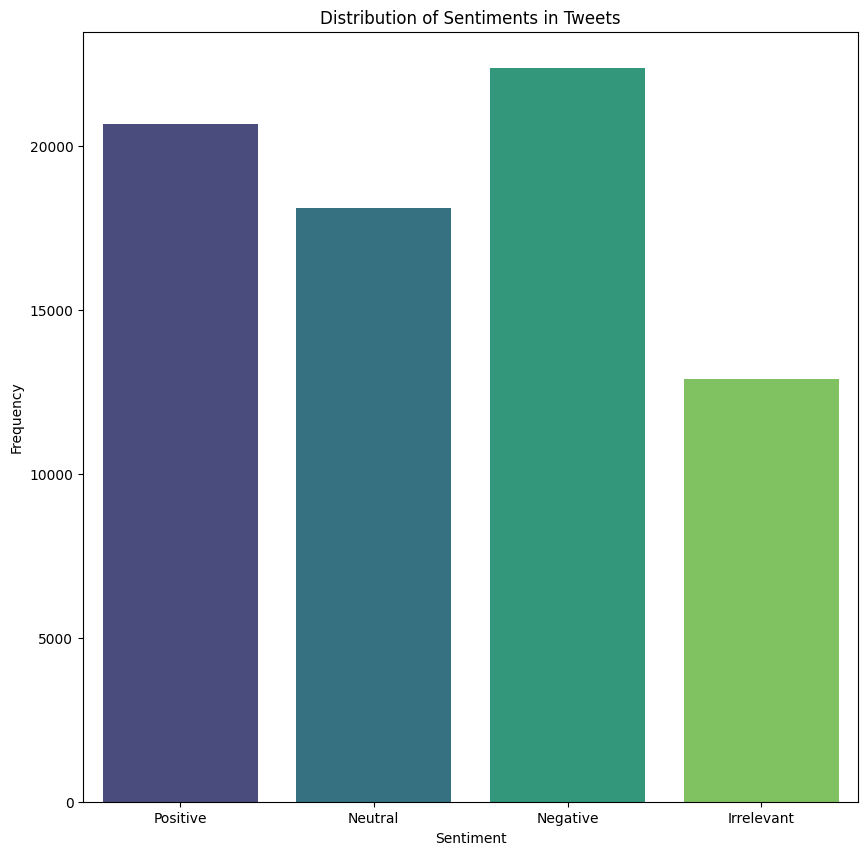

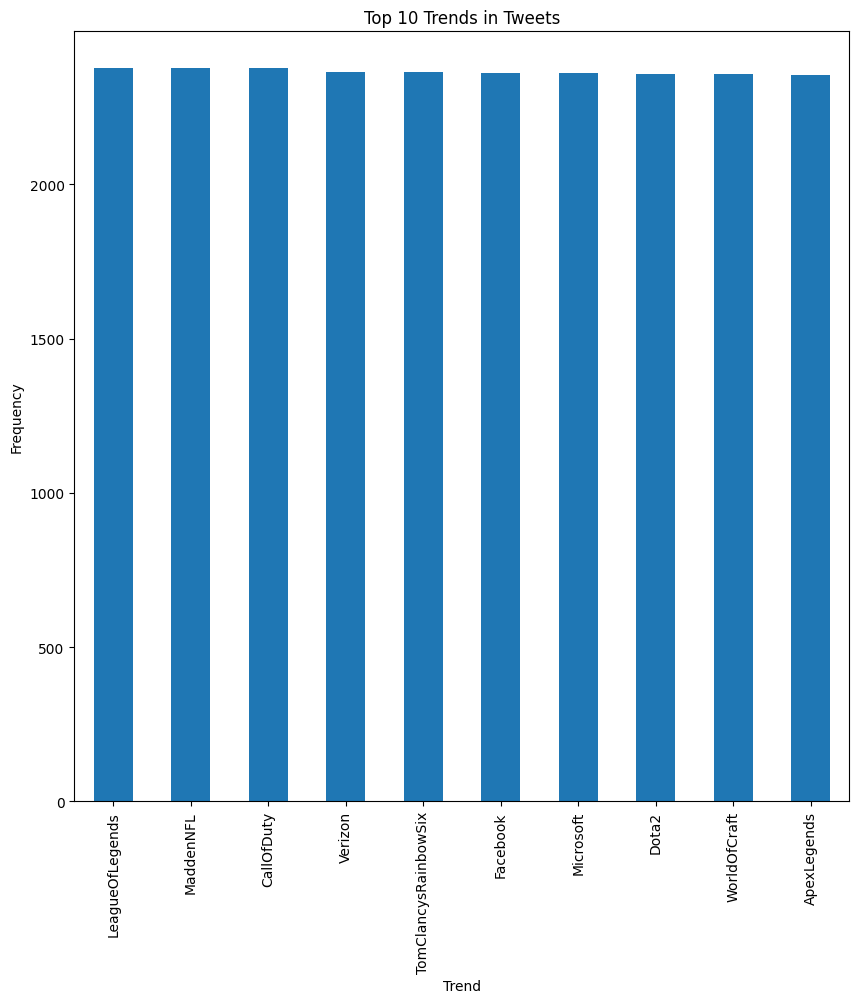

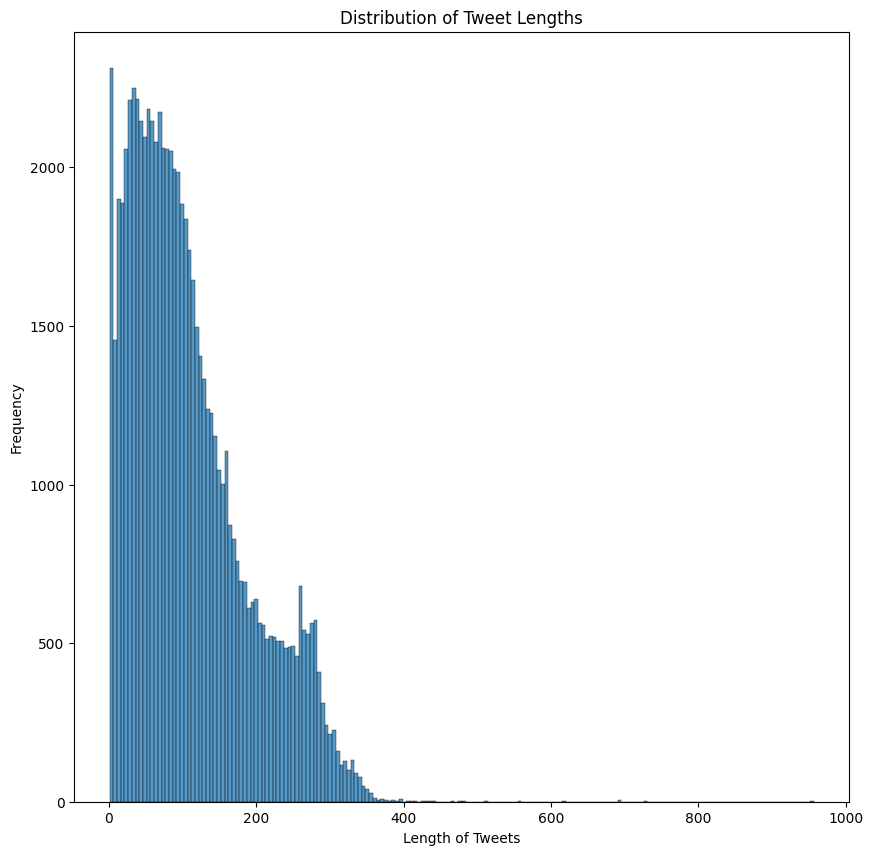

In [ ]:

FIGURE_SIZE=(10,10)
plt.figure(figsize=FIGURE_SIZE)
sns.countplot(x='Sentiments', data=df_train, palette='viridis')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

top_trends = df_train['Trend'].value_counts().head(10)
plt.figure(figsize=FIGURE_SIZE)
top_trends.plot(kind='bar')
plt.title('Top 10 Trends in Tweets')
plt.xlabel('Trend')
plt.ylabel('Frequency')
plt.show()


df_train['tweet_length'] = df_train['Text'].apply(len)
plt.figure(figsize=FIGURE_SIZE)
sns.histplot(df_train['tweet_length'])
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')


def clean_text(text):
    # remove url
    text = re.sub(URL_PATTERN, '', text)
    # Remove user mentions
    text = re.sub(MENTION_PATTERN, '', text)
    # Remove hashtags (but keep the text)
    text = re.sub(HASHTAG_PATTERN, '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text


df_train['cleaned_text'] = df_train['Text'].apply(clean_text)
df_train[['Text', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,cleaned_text
0,im getting on borderlands and i will murder yo...,im get borderland murder
1,I am coming to the borders and I will kill you...,come border kill
2,im getting on borderlands and i will kill you ...,im get borderland kill
3,im coming on borderlands and i will murder you...,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,im get borderland murder


Exploratory Data Analysis (EDA)

Top 20 words in positive tweets (ascending order): [('see', 818), ('cant', 838), ('wait', 916), ('fun', 919), ('great', 992), ('go', 1070), ('one', 1099), ('best', 1112), ('time', 1152), ('look', 1192), ('new', 1199), ('realli', 1290), ('thank', 1304), ('get', 1304), ('like', 1463), ('good', 1626), ('im', 1770), ('love', 2104), ('play', 2548), ('game', 3272)]
Top 20 words in negative tweets (ascending order): [('fifa', 888), ('realli', 979), ('peopl', 983), ('even', 996), ('one', 1030), ('still', 1053), ('pleas', 1122), ('dont', 1127), ('time', 1133), ('make', 1182), ('cant', 1229), ('go', 1272), ('im', 1425), ('fix', 1452), ('shit', 1543), ('like', 1675), ('play', 2084), ('get', 2373), ('fuck', 2463), ('game', 4594)]


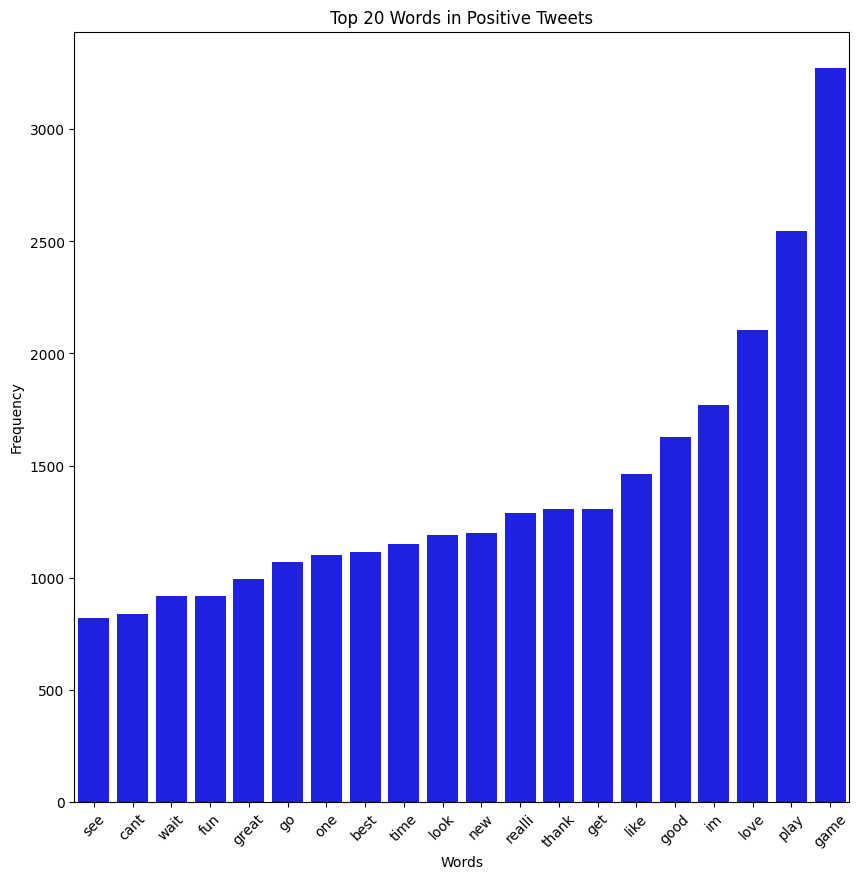

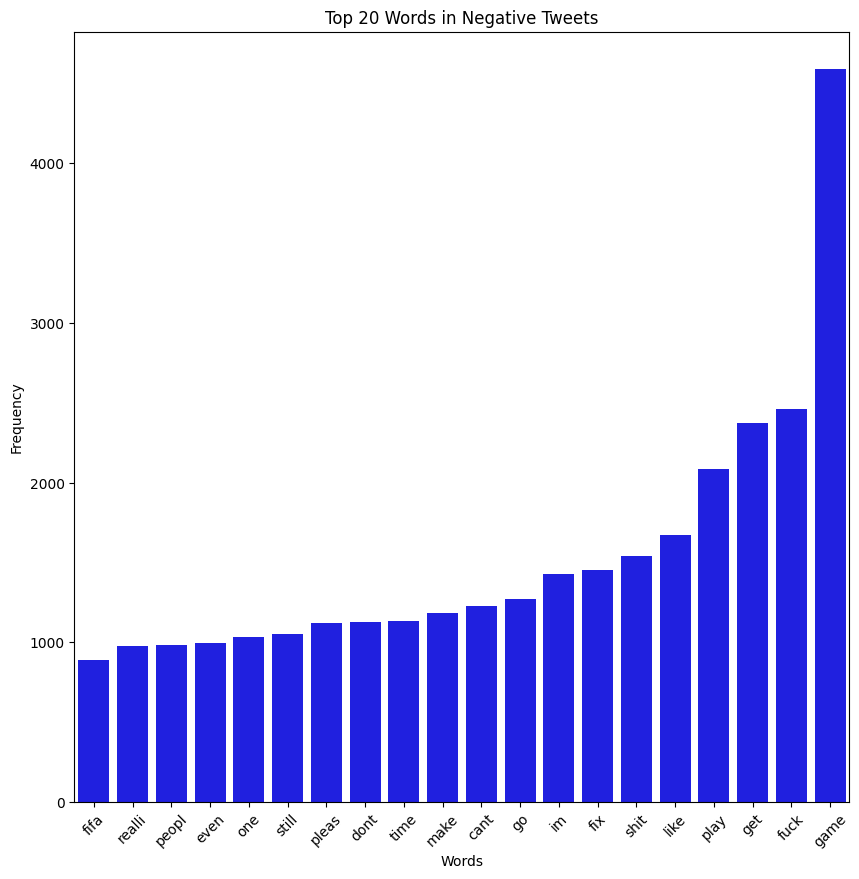

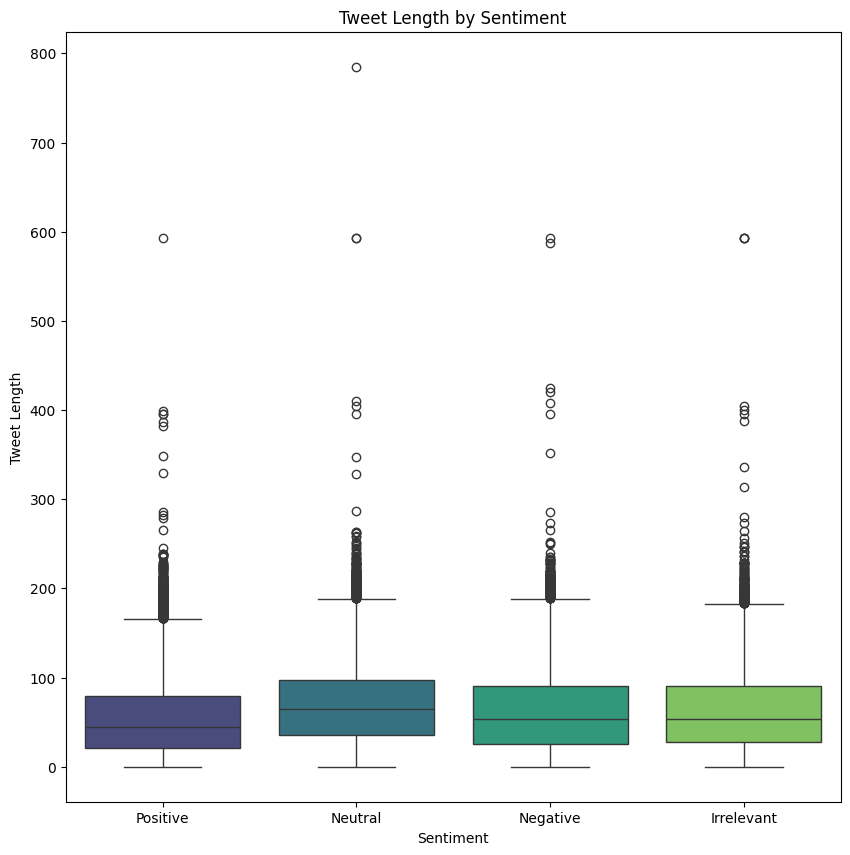

In [ ]:
from collections import Counter
def get_top_words(column, n_top_words):
    words = ' '.join(column).split()
    common_words = Counter(words).most_common(n_top_words)
    return common_words


def get_top_words(column, n_top_words):
    words = ' '.join(column).split()
    common_words = Counter(words).most_common(n_top_words)
    common_words.reverse()  # Reverses the list to ascending order
    return common_words


positive_words = get_top_words(df_train[df_train['Sentiments'] == 'Positive']['cleaned_text'], 20)
print("Top 20 words in positive tweets (ascending order):", positive_words)

negative_words = get_top_words(df_train[df_train['Sentiments'] == 'Negative']['cleaned_text'], 20)
print("Top 20 words in negative tweets (ascending order):", negative_words)



plt.figure(figsize=FIGURE_SIZE)
sns.barplot(x=[word for word, count in positive_words], y=[count for word, count in positive_words], color=BAR_COLOR)
plt.title('Top 20 Words in Positive Tweets')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=FIGURE_SIZE)
sns.barplot(x=[word for word, count in negative_words], y=[count for word, count in negative_words], color=BAR_COLOR)
plt.title('Top 20 Words in Negative Tweets')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


df_train['tweet_length'] = df_train['cleaned_text'].apply(len)
plt.figure(figsize=FIGURE_SIZE)
sns.boxplot(x='Sentiments', y='tweet_length', data=df_train, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()